In [1]:
import pandas as pd

# Load the tab-delimited text file into a DataFrame
filepath = "/Users/jcoleman/Documents/--LARGE DATA--/#Pizzi/TBI-sham leak analysis/scripts/matlab-copy/August 2024/analysisData.csv"
# df = pd.read_csv(filepath, sep='\t') #for text import w/ tab delimiters

df = pd.read_csv(filepath)

# Print the first few rows of the DataFrame
print(df.head())

                                         filename  meanFWHM_1  meanFWHM_2  \
0   ZT10_16X6x_gg_800nm_m5_roi2_00003_ROIs_classA    3.740378    4.100067   
1   ZT10_16X6x_gg_800nm_m6_roi1_00001_ROIs_classA    5.886713    4.679207   
2   ZT10_16X6x_gg_800nm_m7_roi1_00001_ROIs_classA    4.079630    3.446943   
3   ZT10_16X6x_gg_800nm_m9_roi1_00002_ROIs_classA    4.979717    4.802855   
4  ZT10_16X6x_gg_800nm_m10_roi1_00001_ROIs_classA    3.977697    2.942062   

   meanFWHM_3  meanFWHM_4  meanFWHM_5  meanFWHM_6  meanFWHM_7  meanFWHM_8  \
0    6.326261    6.066305         NaN         NaN         NaN         NaN   
1    6.691621    6.233091    5.106044         NaN    4.443435    3.919023   
2    4.057460         NaN    5.208817         NaN         NaN         NaN   
3    3.776378    3.367183    6.708486    4.419400    4.370948    7.461568   
4    5.012042    5.936727    5.160015    4.400999    3.628295    5.456183   

   meanFWHM_9  ...  pstArtLogical_32  pstArtLogical_33  pstArtLogical_34  

In [2]:
print(df['filename'])

0     ZT10_16X6x_gg_800nm_m5_roi2_00003_ROIs_classA
1     ZT10_16X6x_gg_800nm_m6_roi1_00001_ROIs_classA
2     ZT10_16X6x_gg_800nm_m7_roi1_00001_ROIs_classA
3     ZT10_16X6x_gg_800nm_m9_roi1_00002_ROIs_classA
4    ZT10_16X6x_gg_800nm_m10_roi1_00001_ROIs_classA
5    ZT10_16X6x_gg_800nm_m11_roi1_00001_ROIs_classA
6    ZT10_16X6x_gg_800nm_m12_roi1_00001_ROIs_classA
7    ZT10_16X6x_gg_800nm_m13_roi1_00002_ROIs_classA
8    ZT10_16X6x_gg_800nm_m15_roi1_00001_ROIs_classA
9    ZT10_16X6x_gg_800nm_m16_roi1_00001_ROIs_classA
Name: filename, dtype: object


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np

def filter_dataframe(df, metric_prefix, second_metric_prefix, logical_prefix, group):
    """
    Filters the DataFrame to return rows for a specific group and metric columns 
    based on corresponding logical columns being 1.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    metric_prefix (str): The prefix for the first metric column (e.g., 'meanFWHM').
    second_metric_prefix (str): The prefix for the second metric column to plot against.
    logical_prefix (str): The prefix for columns representing logicals (e.g., 'capLogical').
    group (str): The group ID (e.g., 'A', 'B') for row filtering.

    Returns:
    pd.DataFrame: A filtered DataFrame with the two metrics and group columns.
    """
    # Filter rows based on the group
    filtered_df = df[df['group'] == group]

    # Get metric and logical columns
    metric_columns = [col for col in df.columns if col.startswith(metric_prefix)]
    second_metric_columns = [col for col in df.columns if col.startswith(second_metric_prefix)]
    logical_columns = [col for col in df.columns if col.startswith(logical_prefix)]

    # Create a list to store valid metric columns based on logical conditions
    valid_metric_columns = []
    valid_second_metric_columns = []

    # For each metric/logical column pair, check if logical column is 1
    for metric_col, logical_col in zip(metric_columns, logical_columns):
        if (filtered_df[logical_col] == 1).any():
            valid_metric_columns.append(metric_col)

    # Use the same logic to keep second metric columns aligned
    for second_metric_col, logical_col in zip(second_metric_columns, logical_columns):
        if (filtered_df[logical_col] == 1).any():
            valid_second_metric_columns.append(second_metric_col)

    # Return the filtered DataFrame with the two valid metric columns and group
    return filtered_df[valid_metric_columns + valid_second_metric_columns + ['group', 'filename']]

In [86]:
# get meanFeFv, Zmicrons data for 'cap'
filtered_result_capA = filter_dataframe(df, 'meanFWHM', 'stdevFWHM', 'capLogical', 'A')
filtered_result_capB = filter_dataframe(df, 'meanFWHM', 'stdevFWHM', 'capLogical', 'B')

print(filtered_result_capA.head())
print(filtered_result_capB.head())

   meanFWHM_1  meanFWHM_2  meanFWHM_3  meanFWHM_4  meanFWHM_5  meanFWHM_6  \
0    3.740378    4.100067    6.326261    6.066305         NaN         NaN   
1    5.886713    4.679207    6.691621    6.233091    5.106044         NaN   
3    4.979717    4.802855    3.776378    3.367183    6.708486    4.419400   
4    3.977697    2.942062    5.012042    5.936727    5.160015    4.400999   
5    6.396367    4.987402    4.438525    6.238129    3.652761         NaN   

   meanFWHM_7  meanFWHM_8  meanFWHM_9  meanFWHM_10  ...  stdevFWHM_27  \
0         NaN         NaN         NaN          NaN  ...           NaN   
1    4.443435    3.919023    5.440260     5.657550  ...           NaN   
3    4.370948    7.461568         NaN     3.136460  ...           NaN   
4    3.628295    5.456183    6.649782     8.904381  ...           NaN   
5         NaN    4.033243    5.360953     3.303419  ...      0.076763   

   stdevFWHM_28  stdevFWHM_29  stdevFWHM_30  stdevFWHM_31  stdevFWHM_32  \
0           NaN        

In [15]:
# def assign_group(df, grpA_animals, grpB_animals):
#     """
#     Assigns a group value (1 or 2) to each row based on the Animal column.

#     Parameters:
#     df (DataFrame): Input DataFrame
#     grpA_animals (list): List of animal numbers belonging to grpA
#     grpB_animals (list): List of animal numbers belonging to grpB

#     Returns:
#     DataFrame: DataFrame with a new column "group"
#     """
#     df['group'] = df['Animal'].apply(lambda x: 1 if x in grpA_animals else 2 if x in grpB_animals else None)
#     return df

In [68]:
# import re

# def select_columns(df, patterns):
#     """
#     Select columns from the DataFrame based on specified patterns.
    
#     Parameters:
#     df (DataFrame): The input DataFrame.
#     patterns (list of str): List of patterns to match column names. Supports regex.
    
#     Returns:
#     DataFrame: A DataFrame containing only the columns that match the specified patterns.
#     """
#     # Get all column names
#     columns = df.columns
    
#     # Initialize a list to store matched column names
#     matched_columns = []
    
#     # Loop over each pattern
#     for pattern in patterns:
#         # Compile regex pattern
#         regex = re.compile(pattern)
        
#         # Find all columns that match the current pattern
#         matched_columns.extend([col for col in columns if regex.match(col)])
    
#     # Drop duplicates in case columns match multiple patterns
#     matched_columns = list(set(matched_columns))
    
#     # Return the DataFrame with only the matched columns
#     return df[matched_columns]

# # # Example usage
# # data = {
# #     'meanFWHM_1': [1, 2, 3],
# #     'meanFWHM_2': [4, 5, 6],
# #     'stdevFWHM_1': [7, 8, 9],
# #     'stdevFeFv_1': [10, 11, 12],
# #     'otherMetric_1': [13, 14, 15]
# # }

# # df = pd.DataFrame(data)

# # Define the patterns you want to include
# patterns = ['meanFWHM_', 'stdevFWHM_','minFWHM_','maxFWHM_',
#             'meanFeFv_', 'stdevFeFv_','minFeFv_','maxFeFv_',
#             'X_','Y_','Z_']

# # Get the columns that match the patterns
# filtered_df = select_columns(df, patterns)

# # print(filtered_df)
# print(filtered_df.head())


In [10]:
 

# data1mean = list()
# # data2mean = list()

# data1mean = df['Fe/Fv']

# # for i in range(len(data1)):
# #     data1mean.append(np.nanmean(data1[i]))
# # for i in range(len(data2)):
# #     data2mean.append(np.nanmean(data2[i]))
    
# #print(data1mean)
# #print(data2mean)

# df2 = assign_group(df, grpA, grpB)

# print(df2)

In [11]:
# display(df2)

In [92]:
# grpA_data = df.loc[df['group'] == 1, 'Fe/Fv'].values
# grpB_data = df.loc[df['group'] == 2, 'Fe/Fv'].values

temp_df_A = filtered_result_capA
temp_df_B = filtered_result_capB
metric_prefix = 'stdevFWHM_'
# # Extract columns that start with the given prefixes
# metric_columns = [col for col in temp_df.columns if col.startswith(metric_prefix)]

# # Concatenate all metric columns into single arrays for plotting
# x_vals = pd.concat([temp_df[metric] for metric in metric_columns], axis=0)
# filenames = pd.concat([temp_df['filename']] * len(metric_columns), axis=0)

# print(filenames)

# Example DataFrame setup
# data = {
#     'filename': ['file1', 'file2', 'file3'],
#     'meanFWHM_1': [1, 2, 3],
#     'meanFWHM_2': [4, 5, 6],
#     'meanFWHM_3': [7, 8, 9],
#     'otherMetric_1': [10, 11, 12]
# }

# temp_df = pd.DataFrame(data)

# Extract columns that start with the given prefix
metric_columns_A = [col for col in temp_df_A.columns if col.startswith(metric_prefix)]
metric_columns_B = [col for col in temp_df_B.columns if col.startswith(metric_prefix)]
# Melt the DataFrame to long format
long_df_A = temp_df_A.melt(id_vars=['filename'], value_vars=metric_columns_A,
                       var_name='Metric', value_name='Value')
long_df_B = temp_df_B.melt(id_vars=['filename'], value_vars=metric_columns_B,
                       var_name='Metric', value_name='Value')

print(long_df_A)
print('next')
print(long_df_B)


                                           filename        Metric     Value
0     ZT10_16X6x_gg_800nm_m5_roi2_00003_ROIs_classA   stdevFWHM_1  0.120027
1     ZT10_16X6x_gg_800nm_m6_roi1_00001_ROIs_classA   stdevFWHM_1  0.134211
2     ZT10_16X6x_gg_800nm_m9_roi1_00002_ROIs_classA   stdevFWHM_1  0.202292
3    ZT10_16X6x_gg_800nm_m10_roi1_00001_ROIs_classA   stdevFWHM_1  0.085332
4    ZT10_16X6x_gg_800nm_m11_roi1_00001_ROIs_classA   stdevFWHM_1  0.196553
..                                              ...           ...       ...
199   ZT10_16X6x_gg_800nm_m6_roi1_00001_ROIs_classA  stdevFWHM_36       NaN
200   ZT10_16X6x_gg_800nm_m9_roi1_00002_ROIs_classA  stdevFWHM_36       NaN
201  ZT10_16X6x_gg_800nm_m10_roi1_00001_ROIs_classA  stdevFWHM_36       NaN
202  ZT10_16X6x_gg_800nm_m11_roi1_00001_ROIs_classA  stdevFWHM_36       NaN
203  ZT10_16X6x_gg_800nm_m12_roi1_00001_ROIs_classA  stdevFWHM_36  0.258144

[204 rows x 3 columns]
next
                                           filename        

In [93]:
print(long_df_A['Value'])

0      0.120027
1      0.134211
2      0.202292
3      0.085332
4      0.196553
         ...   
199         NaN
200         NaN
201         NaN
202         NaN
203    0.258144
Name: Value, Length: 204, dtype: float64


In [94]:
# PREFERRED CUMUL PLOT METHOD AS OF 5-13-24

import numpy as np
import matplotlib.pyplot as plt

def plot_cumulative_probability(group1_data, group2_data, figure_filename, bins=30, figsize=(8, 6), font_size=12):
    """
    Plot cumulative probability histograms of two groups of input data side by side.

    Parameters:
    - group1_data: Array-like, data for Group 1.
    - group2_data: Array-like, data for Group 2.
    - bins: int or sequence of scalars or str, optional (default=30)
            If an integer, defines the number of equal-width bins in the range.
            If a sequence, defines the bin edges, including the rightmost edge, allowing for non-uniform bin widths.
            If a string, it defines the method used to calculate the optimal bin width, as defined by `np.histogram_bin_edges`.
    - figsize: tuple, optional (default=(8, 6))
               Width, height in inches.
    - font_size: int or float, optional (default=12)
                 Font size.
    """
    # Set font type and size
    plt.rcParams.update({'font.family': 'Arial', 'font.style': 'normal', 'font.size': font_size})

    # Calculate the bin edges
    hist_range = (min(min(group1_data), min(group2_data)), max(max(group1_data), max(group2_data)))
    bins = np.linspace(*hist_range, bins)

    # Create subplots
    fig, ax = plt.subplots(figsize=figsize)

    # Plot cumulative probability histograms for both groups
    weights1_prob = np.ones_like(group1_data) / len(group1_data)
    weights2_prob = np.ones_like(group2_data) / len(group2_data)

    ax.hist(group1_data, bins=bins, color='black', alpha=0.5, cumulative=True, weights=weights1_prob, label='Group 1', histtype='step', linewidth=2)
    ax.hist(group2_data, bins=bins, color='red', alpha=0.5, cumulative=True, weights=weights2_prob, label='Group 2', histtype='step', linewidth=2)
    
    # Set labels and title
    ax.set_xlabel(MetricID, fontsize=font_size)
    ax.set_ylabel('Cumulative Probability', fontsize=font_size)
    ax.set_title('Cumulative Probability Histograms of Group A and Group B', fontsize=font_size)

    # Add legends for both groups
    plt.legend(['Group A', 'Group B'], frameon=False, loc='upper left')
    
    # BETTER WAY??? White-out the last vertical line for asthetics
    whiteout_line_xloc  = max(max(group1_data), max(group2_data))
    ax.axvline(x = whiteout_line_xloc, color = 'white', linewidth = 2, alpha=1.0)
    
    # Save the plot as a PDF file
    plt.savefig(figure_filename + '.pdf', format='pdf', dpi=300) #, bbox_inches='tight')
    
    # Save the plot as an EPS file
    plt.savefig(figure_filename + '.eps', format='eps', dpi=300) #, bbox_inches='tight')
    
    # Save the plot as a PNG file
    plt.savefig(figure_filename + '.png', format='PNG', dpi=300) #, bbox_inches='tight')
    
    # Save the plot as a TIF file
    #plt.savefig('example_plot.tiff', format='tiff', dpi=300)

    plt.show()

# Example usage:
# group1_data = np.random.normal(loc=0, scale=1, size=1000)
# group2_data = np.random.normal(loc=2, scale=1.5, size=1000)
# plot_cumulative_probability(data1, data2, figsize=(10, 8), font_size=14)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


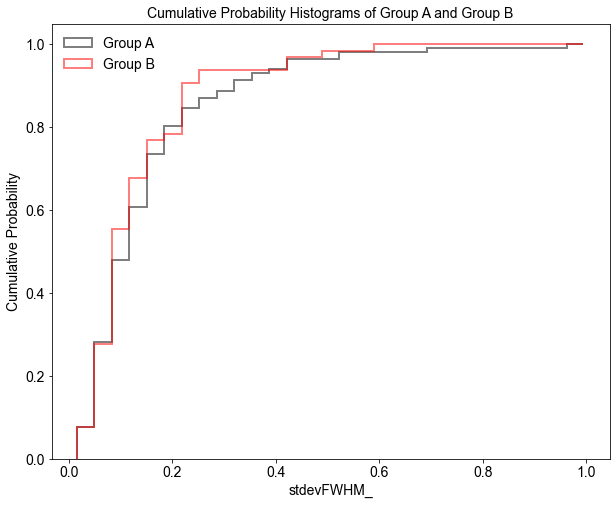

In [95]:
# try plotting
MetricID = metric_prefix # 'FeFv' #needs to match dict_variable_names[x]

grpA_data = np.array(long_df_A['Value'])
grpA_data = np.array(long_df_A['Value'].dropna())

grpB_data = np.array(long_df_B['Value'])
grpB_data = np.array(long_df_B['Value'].dropna())
#print(grpA_data)

filename_out = 'cdfplots_CAP' + MetricID
plot_cumulative_probability(grpA_data, grpB_data, filename_out, figsize=(10, 8), font_size=14)

In [96]:
from scipy.stats import ks_2samp

# Example KstestResult object
result = ks_2samp(grpA_data, grpB_data)

# Create a formatted string
result_str = (
    f"KstestResult\n"
    f"Statistic: {result.statistic:.6f}\n"
    f"P-value: {result.pvalue:.6f}\n"
    f"Statistic Location: {result.statistic_location:.6f}\n"
    f"Statistic Sign: {result.statistic_sign}\n"
)

# add results table to TXT file
textout = filename_out + '_kstest_result.txt'
# Define the file path
# file_path = 'kstest_result.txt'

# Write the formatted string to a text file
with open(textout, 'w') as file:
    file.write(result_str)

print(f"Results written to {textout}")

# """
# All statistical analyses were performed using R (
# http://www.r-project.org
# /) or MATLAB. Cilia lengths were analyzed using the two-sample Kolmogorov-Smirnov (K-S) test.
# For the K-S tests we applied a Bonferroni correction for the number of regions analyzed within each
# brain to the standard p value of 0.05. Thus, for PTZ experiments, we set the statistical significance at
# p < 0.008 for Arl13b + (glial) cilia and p < 0.007 for ACIII + (neuronal) cilia measurements.
# For KA experiments, statistical significance for K-S tests was set at p < 0.012.
# """

Results written to cdfplots_CAPstdevFWHM__kstest_result.txt
